# Arrow
Vaex supports [Arrow](https://arrow.apache.org). We will demonstrate vaex+arrow by giving a quick look at a large dataset that does not fit into memory. The NYC taxi dataset for the year 2015 contains about 150 million rows containing information about taxi trips in New York, and is about 23GB in size. You can download it here:
 
 * https://docs.vaex.io/en/latest/datasets.html

In case you want to convert it to the arrow format, use the code below:
```python
ds_hdf5 = vaex.open('/Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.hdf5')
# this may take a while to export
ds_hdf5.export('./nyc_taxi2015.arrow')
```

In [1]:
!ls -alh /Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.arrow

-rw-r--r--  1 maartenbreddels  staff    23G Oct 31 18:56 /Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.arrow


In [3]:
import vaex

## Opens instantly
Opening the file goes instantly, since nothing is being copied to memory. The data is only memory mapped, a technique that will only read the data when needed.

In [4]:
%time
df = vaex.open('/Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.arrow')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [5]:
df

## Quick viz of 146 million rows
As can be seen, this dataset contains 146 million rows.
Using plot, we can generate a quick overview what the data contains. The pickup locations nicely outline Manhattan.

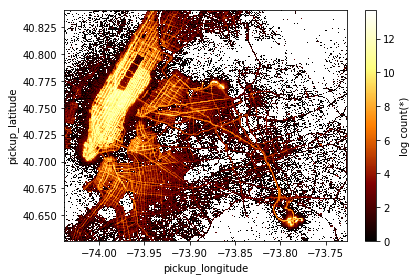

In [6]:
df.viz.heatmap(df.pickup_longitude, df.pickup_latitude, f='log')

In [7]:
df.total_amount.minmax()

array([-4.9630000e+02,  3.9506116e+06])

## Data cleansing: outliers
As can be seen from the total_amount columns (how much people payed), this dataset contains outliers. From a quick 1d plot, we can see reasonable ways to filter the data

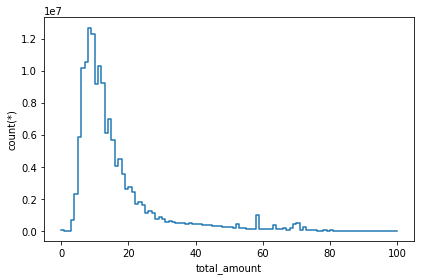

In [8]:
df.plot1d(df.total_amount, shape=100, limits=[0, 100])

In [9]:
# filter the dataset
dff = df[(df.total_amount >= 0) & (df.total_amount < 100)]

## Shallow copies
This filtered dataset did not copy any data (otherwise it would have costed us about ~23GB of RAM). Shallow copies of the data are made instead and a booleans mask tracks which rows should be used.

In [10]:
dff['ratio'] = dff.tip_amount/dff.total_amount

## Virtual column
The new column `ratio` does not do any computation yet, it only stored the expression and does not waste any memory. However, the new (virtual) column can be used in calculations as if it were a normal column.

In [11]:
dff.ratio.mean()

<string>:1: RuntimeWarning: invalid value encountered in true_divide


0.09601926650107262

## Result
Our final result, the percentage of the tip, can be easily calcualted for this large dataset, it did not require any excessive amount of memory.

## Interoperability
Since the data lives as Arrow arrays, we can pass them around to other libraries such as pandas, or even pass it to other processes.

In [12]:
arrow_table = df.to_arrow_table()
arrow_table

pyarrow.Table
VendorID: int64
dropoff_dayofweek: double
dropoff_hour: double
dropoff_latitude: double
dropoff_longitude: double
extra: double
fare_amount: double
improvement_surcharge: double
mta_tax: double
passenger_count: int64
payment_type: int64
pickup_dayofweek: double
pickup_hour: double
pickup_latitude: double
pickup_longitude: double
tip_amount: double
tolls_amount: double
total_amount: double
tpep_dropoff_datetime: timestamp[ns]
tpep_pickup_datetime: timestamp[ns]
trip_distance: double

In [13]:
# Although you can 'convert' (pass the data) in to pandas,
# some memory will be wasted (at least an index will be created by pandas)
# here we just pass a subset of the data
df_pandas = df[:10000].to_pandas_df()
df_pandas

,VendorID,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,...,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,2,3.0,19.0,40.750618,-73.974785,1.0,12.0,0.3,0.5,1,...,3.0,19.0,40.750111,-73.993896,3.25,0.00,17.05,2015-01-15 19:23:42,2015-01-15 19:05:39,1.59
1,1,5.0,20.0,40.759109,-73.994415,0.5,14.5,0.3,0.5,1,...,5.0,20.0,40.724243,-74.001648,2.00,0.00,17.80,2015-01-10 20:53:28,2015-01-10 20:33:38,3.30
2,1,5.0,20.0,40.824413,-73.951820,0.5,9.5,0.3,0.5,1,...,5.0,20.0,40.802788,-73.963341,0.00,0.00,10.80,2015-01-10 20:43:41,2015-01-10 20:33:38,1.80
3,1,5.0,20.0,40.719986,-74.004326,0.5,3.5,0.3,0.5,1,...,5.0,20.0,40.713818,-74.009087,0.00,0.00,4.80,2015-01-10 20:35:31,2015-01-10 20:33:39,0.50
4,1,5.0,20.0,40.742653,-74.004181,0.5,15.0,0.3,0.5,1,...,5.0,20.0,40.762428,-73.971176,0.00,0.00,16.30,2015-01-10 20:52:58,2015-01-10 20:33:39,3.00
5,1,5.0,20.0,40.758194,-73.986977,0.5,27.0,0.3,0.5,1,...,5.0,20.0,40.774048,-73.874374,6.70,5.33,40.33,2015-01-10 20:53:52,2015-01-10 20:33:39,9.00
6,1,5.0,20.0,40.749634,-73.992470,0.5,14.0,0.3,0.5,1,...,5.0,20.0,40.726009,-73.983276,0.00,0.00,15.30,2015-01-10 20:58:31,2015-01-10 20:33:39,2.20
7,1,5.0,20.0,40.726326,-73.995010,0.5,7.0,0.3,0.5,3,...,5.0,20.0,40.734142,-74.002663,1.66,0.00,9.96,2015-01-10 20:42:20,2015-01-10 20:33:39,0.80
8,1,5.0,21.0,40.759357,-73.987595,0.0,52.0,0.3,0.5,3,...,5.0,20.0,40.644356,-73.783043,0.00,5.33,58.13,2015-01-10 21:11:35,2015-01-10 20:33:39,18.20
9,1,5.0,20.0,40.759365,-73.985916,0.5,6.5,0.3,0.5,2,...,5.0,20.0,40.767948,-73.985588,1.55,0.00,9.35,2015-01-10 20:40:44,2015-01-10 20:33:40,0.90


## Tutorial
If you want to learn more on vaex, take a look at the [tutorials to see what is possible](https://docs.vaex.io/en/latest/tutorial.html).